In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappush, heappop
import pandas as pd
from pprint import pprint
import math
import time
import sys
import random
import copy




data1=pd.read_csv('E:/SEMESTER 6/ML-CS60050/Assgnment/Third/AllBooks_baseline_DTM_Labelled.csv') #importing the data
n1=len(data1.axes[0]) #to find number of rows in each attribute

data1.drop([13], inplace = True) # removing "Buddhism_Ch14" from Dataframe

data1.reset_index(drop=True, inplace=True) # to adjust indices accordingly

data1["Unnamed: 0"]=data1["Unnamed: 0"].str.replace(r'_Ch', '') # to remove "_Ch" 
data1["Unnamed: 0"] = data1["Unnamed: 0"].str.replace('\d+', '') # to remove number after book name
print(data1.iloc[0:20,:])

data2=data1.drop(data1.columns[0],axis='columns') # removing string column
print('final data to be used : \n',data2.iloc[0:20,0:10])



   Unnamed: 0  foolishness  hath  wholesome  takest  feelings  anger  \
0    Buddhism            0     0          0       0         0      0   
1    Buddhism            0     0          0       0         0      0   
2    Buddhism            0     0          0       0         0      0   
3    Buddhism            0     0          0       0         0      0   
4    Buddhism            0     0          0       0         0      0   
5    Buddhism            0     0          0       0         0      0   
6    Buddhism            0     0          0       0         0      0   
7    Buddhism            0     0          0       0         0      0   
8    Buddhism            0     0          0       0         0      0   
9    Buddhism            0     0          0       0         0      0   
10   Buddhism            0     0          0       0         0      0   
11   Buddhism            0     0          0       0         0      0   
12   Buddhism            0     0          0       0         0   

In [2]:
def cosine_similarity_distance(point_1, point_2): # to find distance
    distance=0.0
    distance=np.dot(point_1, point_2)
    dinominator=np.sqrt(np.dot(point_1,point_1)*np.dot(point_2,point_2))
    distance=distance/dinominator
    
    return(np.exp(-distance))
    
    

def add_points(point_1, point_2):
    for i in range(0, len(point_1)):
        point_1[i] = float(point_1[i]) + float(point_2[i])
    return point_1


In [3]:
data=data2.values

k_value=8 # no. of cluster =8
#distances=[]
distances=[]
for i in range(len(data)):
    row=[]
    for j in range(i):
        row.append(cosine_similarity_distance(data[i],data[j]))
    distances.append(row)
    del(row)


cluster=[]
for i in range(len(data)):
    cluster.append([i])

while(len(cluster)>k_value): 
    min1=1000
    combine=[0,1]
    for i in range(len(cluster)):
        for j in range(i+1,len(cluster)):
            #temp=single_linkage(cluster,distances,i,j)
            min_value=1000
            for m in cluster[i]:
                for n in cluster[j]:
                    if(m>n):
                        if(min_value>distances[m][n]):
                            min_value=distances[m][n]
                        else:
                            min_value=distances[n][m]
            temp=min_value  
        
            
            if(min1>temp):
                min1=temp
                combine[0]=i
                combine[1]=j
    cluster[combine[0]]=cluster[combine[0]]+cluster[combine[1]]
    del(cluster[combine[1]])
       
sorted_cluster=sorted(cluster)

In [4]:
#k_value=8 # 8 cluster we taking here
#agglomerative_local(data2, k_value)
#cluster=centroid_points
#for i in range(len(cluster)):
#    cluster[i]=sorted(cluster[i]) # sorting each row of final cluster or say centroid point

#sorted_cluster=sorted(cluster) # sorting the final value
print('cluster size: ',len(sorted_cluster))
j=1
for i in sorted_cluster: # total 8 cluster
    print("#")
    #print("cluster-",j,"=",i)
    #print("\n \n")
    #j=j+1
for i in sorted_cluster: # total 8 cluster
    print("#")
    print("cluster-",j,"=",i)
    print("\n \n")
    j=j+1    

cluster size:  8
#
#
#
#
#
#
#
#
#
cluster- 1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

In [5]:
f=open("E:/SEMESTER 6/ML-CS60050/Assgnment/Third/agglomerative.txt",'w')
for i in range(len(sorted_cluster)):
    for j in sorted_cluster[i]:
        f.write(str(j))
        f.write(",")
    f.write("\n")
f.close()  
# Actual code ends here


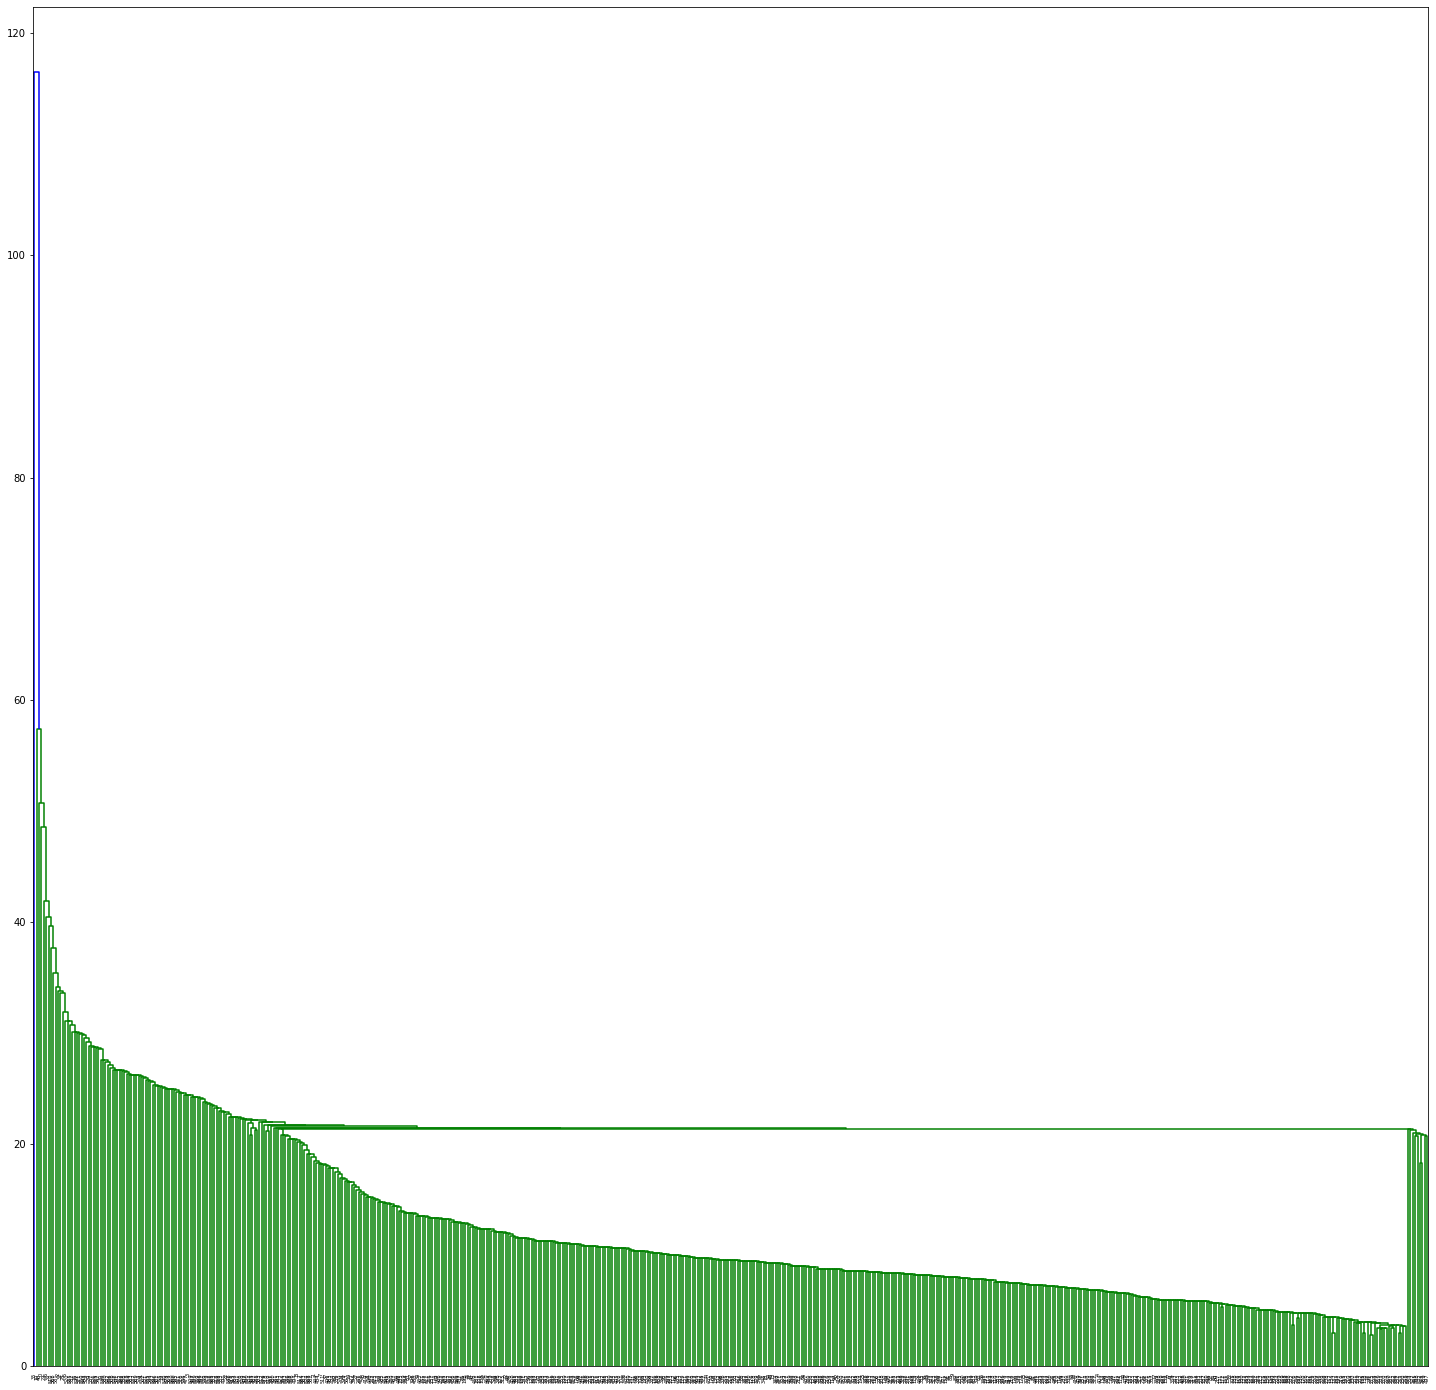

In [6]:
#this part not neccessary so I'am using libaray for it because it has not been asked in question
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(data2, 'single')
fig = plt.figure(figsize=(25, 25))
dn = dendrogram(Z)
#plt.hlines(y=190,xmin=0,xmax=2000,lw=10,linestyles='--')
#plt.text(x=900,y=36,s='Horizontal line crossing 8 vertical lines',fontsize=20)
#plt.grid(True)